# Convolutional Neural Network for CIFAR10 dataset

CIFAR10 is a small image classification dataset. Its objective is to classification an 32x32 color image into 10 classes.

See https://www.cs.toronto.edu/~kriz/cifar.html and https://keras.io/api/datasets/cifar10/ for more details.

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Load CIFAR10 dataset
(x, y), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
y, y_test = y.flatten(), y_test.flatten()
x = x / 255
x_test = x_test / 255

170498071/170498071 [==============================] - 14s 0us/step


In [ ]:
print(x[0])

[[[0.23137255 0.24313725 0.24705882]
  [0.16862745 0.18039216 0.17647059]
  [0.19607843 0.18823529 0.16862745]
  ...
  [0.61960784 0.51764706 0.42352941]
  [0.59607843 0.49019608 0.4       ]
  [0.58039216 0.48627451 0.40392157]]

 [[0.0627451  0.07843137 0.07843137]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.34509804 0.21568627]
  [0.46666667 0.3254902  0.19607843]
  [0.47843137 0.34117647 0.22352941]]

 [[0.09803922 0.09411765 0.08235294]
  [0.0627451  0.02745098 0.        ]
  [0.19215686 0.10588235 0.03137255]
  ...
  [0.4627451  0.32941176 0.19607843]
  [0.47058824 0.32941176 0.19607843]
  [0.42745098 0.28627451 0.16470588]]

 ...

 [[0.81568627 0.66666667 0.37647059]
  [0.78823529 0.6        0.13333333]
  [0.77647059 0.63137255 0.10196078]
  ...
  [0.62745098 0.52156863 0.2745098 ]
  [0.21960784 0.12156863 0.02745098]
  [0.20784314 0.13333333 0.07843137]]

 [[0.70588235 0.54509804 0.37647059]
  [0.67843137 0.48235294 0.16470588]


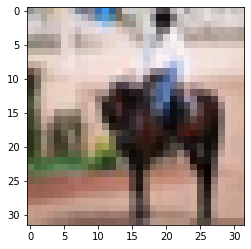

Class= 7


In [ ]:
# Plot a training example
plt.imshow(x[11, :, :, :])
plt.show()
print(f"Class= {y[11]}")        # 7 = horse

In [ ]:
# Split the training set
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=11)
X_test = x_test

print("Shape of the datasets")
print("Training set   =", X_train.shape, y_train.shape)
print("Validation set =", X_valid.shape, y_valid.shape)
print("Test set       =", X_test.shape, y_test.shape)

Shape of the datasets
Training set   = (40000, 32, 32, 3) (40000,)
Validation set = (10000, 32, 32, 3) (10000,)
Test set       = (10000, 32, 32, 3) (10000,)


In [ ]:
# Use one-hot encoding for y
Y_train = tf.one_hot(y_train, 10)
Y_valid = tf.one_hot(y_valid, 10)
Y_test = tf.one_hot(y_test, 10)

In [ ]:
print(X_train[0].shape) # checking shape of the first image in training set

(32, 32, 3)


In [ ]:
# Your implementation for Question 2
# import needed libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
%matplotlib inline

In [ ]:
# Load CIFAR10 dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
X_train = X_train / 255
X_test = X_test / 255

y_train, y_test = y_train.flatten(), y_test.flatten()

170498071/170498071 [==============================] - 3s 0us/step


In [ ]:
#print(X_train[0])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train,
                                                      test_size = 0.1,
                                                      shuffle = True,
                                                      random_state = 6299)

In [ ]:
print(X_train.shape, y_train.shape)

(45000, 32, 32, 3) (45000,)


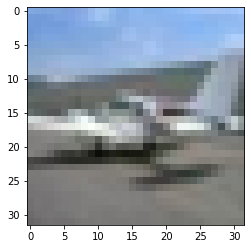

In [ ]:
# check data provied
# to display an image before normalization
plt.imshow(X_train[0, :, :, :])
plt.show()

In [ ]:
# Use one-hot encoding for y
y_train = tf.one_hot(y_train, 10)
y_valid = tf.one_hot(y_valid, 10)
y_test = tf.one_hot(y_test, 10)

In [ ]:
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
  width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
 
train_generator = data_generator.flow(X_train, y_train, 4096)


In [ ]:
input = tf.keras.layers.Input(shape=(32,32,3))

In [ ]:
# the first weak learner for feature extractor
x1 = tf.keras.layers.Conv2D(32, (3,3),input_shape=(32,32,3), padding='same', activation='relu')(input)
x1 = tf.keras.layers.BatchNormalization()(x1)
x1 = tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu')(x1)
x1 = tf.keras.layers.BatchNormalization()(x1)
x1 = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(x1)
x1 = tf.keras.layers.Dropout(0.3)(x1)

x1 = tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu')(x1)
x1 = tf.keras.layers.BatchNormalization()(x1)
x1 = tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu')(x1)
x1 = tf.keras.layers.BatchNormalization()(x1)
x1 = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(x1)
x1 = tf.keras.layers.Dropout(0.5)(x1)

x1 = tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu')(x1)
x1 = tf.keras.layers.BatchNormalization()(x1)
x1 = tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu')(x1)
x1 = tf.keras.layers.BatchNormalization()(x1)
x1 = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(x1)
x1 = tf.keras.layers.Dropout(0.5)(x1)


# the second weak learner for feature extractor
x2 =  tf.keras.layers.Conv2D(32, (3, 3),input_shape=(32,32,3), activation='relu', padding='same')(input)
x2 = tf.keras.layers.BatchNormalization()(x2)
x2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x2)
x2 = tf.keras.layers.BatchNormalization()(x2)
x2 = tf.keras.layers.MaxPooling2D((2, 2))(x2)
 
x2 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x2)
x2 = tf.keras.layers.BatchNormalization()(x2)
x2 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x2)
x2 = tf.keras.layers.BatchNormalization()(x2)
x2 = tf.keras.layers.MaxPooling2D((2, 2))(x2)
 
x2 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x2)
x2 = tf.keras.layers.BatchNormalization()(x2)
x2 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x2)
x2 = tf.keras.layers.BatchNormalization()(x2)
x2 = tf.keras.layers.MaxPooling2D((2, 2))(x2)

x = tf.keras.layers.Add()([x1, x2])
outputs = tf.keras.layers.GlobalMaxPooling2D()(x)
outputs = tf.keras.layers.Dropout(0.1)(outputs)
outputs = tf.keras.layers.Dense(128,
                                activation='relu',
                                kernel_regularizer=tf.keras.regularizers.l2(0.05))(outputs)
outputs = tf.keras.layers.Dense(activation='relu', 
                                units=64,
                                kernel_regularizer=tf.keras.regularizers.l2(0.05), 
                                bias_regularizer=tf.keras.regularizers.L2(0.05))(outputs)
outputs = tf.keras.layers.Dense(10, activation='softmax')(outputs)

model = tf.keras.Model(input, outputs)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 32, 32, 32)   896         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 32, 32, 32)  128         ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 conv2d_1 (Conv2D)              (None, 32, 32, 32)   9248        ['batch_normalization[0][0]']

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(25e-3), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
hist2 = model.fit(train_generator, 
                  batch_size=4096, 
                  validation_data=(X_valid, y_valid), 
                  epochs=100,
                  callbacks=[EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5, verbose=1)],
                  shuffle=True)

Epoch 1/100
11/11 [==============================] - 23s 2s/step - loss: 4.8001 - accuracy: 0.5895 - val_loss: 7.5464 - val_accuracy: 0.3680
Epoch 2/100
11/11 [==============================] - 21s 2s/step - loss: 4.1673 - accuracy: 0.7435 - val_loss: 7.0764 - val_accuracy: 0.5028
Epoch 3/100
11/11 [==============================] - 21s 2s/step - loss: 2.8944 - accuracy: 0.8078 - val_loss: 4.0214 - val_accuracy: 0.6498
Epoch 4/100
11/11 [==============================] - 20s 2s/step - loss: 1.8261 - accuracy: 0.8427 - val_loss: 2.4743 - val_accuracy: 0.7234
Epoch 5/100
11/11 [==============================] - 21s 2s/step - loss: 1.2063 - accuracy: 0.8645 - val_loss: 1.7176 - val_accuracy: 0.7440
Epoch 6/100
11/11 [==============================] - 20s 2s/step - loss: 0.8650 - accuracy: 0.8804 - val_loss: 1.0645 - val_accuracy: 0.8130
Epoch 7/100
11/11 [==============================] - 21s 2s/step - loss: 0.6567 - accuracy: 0.8939 - val_loss: 0.8563 - val_accuracy: 0.8258
Epoch 8/100
1

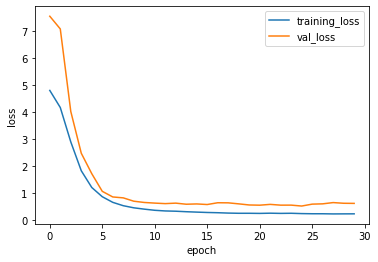

In [ ]:
# Plot the training loss and validation loss
N = len(hist2.history['loss'])
plt.plot(np.arange(N), hist2.history['loss'])
plt.plot(np.arange(N), hist2.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training_loss', 'val_loss'], loc='upper right')
plt.show()

In [ ]:
res = model.evaluate(X_train, y_train, verbose=0, batch_size=2048)
print(f"Training accuracy   = {res[1]:.4f}")
res = model.evaluate(X_valid, y_valid, verbose=0, batch_size=2048)
print(f"Validation accuracy = {res[1]:.4f}")
res = model.evaluate(X_test, y_test, verbose=0, batch_size=2048)
print(f"Test accuracy       = {res[1]:.4f}")

Training accuracy   = 0.9108
Validation accuracy = 0.8390
Test accuracy       = 0.8339
